# Exploratory Data Analysis: Upset Patterns in ATP Matches

This notebook analyzes upset patterns across different features in professional tennis matches.

**Upset Definition**: A match where the winner's ATP ranking is at least 20 positions worse (numerically higher) than the opponent's ranking.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load all featured data files
data_path = Path('Featured_Data_Atp_matches')
dfs = []
for file in data_path.glob('*.xlsx'):
    df = pd.read_excel(file)
    dfs.append(df)

# Combine all years
df = pd.concat(dfs, ignore_index=True)
print(f"Total matches: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Total matches: 21526
Columns: ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'winner_seed', 'winner_name', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_seed', 'loser_name', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'rank_difference', 'upset', 'w_ace_df_ratio', 'l_ace_df_ratio', 'w_1st_serve_pct', 'l_1st_serve_pct', 'w_1st_serve_won_pct', 'l_1st_serve_won_pct', 'w_2nd_serve_won_pct', 'l_2nd_serve_won_pct', 'w_bp_saved_pct', 'l_bp_saved_pct', 'w_serve_efficiency', 'l_serve_efficiency', 'tourney_date', 'winner_total_matches_90d', 'winner_win_ratio_90d', 'loser_total_matches_90d', 'loser_win_ratio_90d', 'winner_career_matches', 'winner_career_win_rate', 'winner_hard_win_rate', 'winner_hard_differential', 'winner_clay_win_rate', 'winner_clay_differential', 'winner_grass_win_rate', 'winner_grass_differential', 'winner_surface_versatility', 'loser_career_matches', 'loser_career_win_rate', 'loser_hard_win_rate', 'loser_hard_differ

## 2. Upset Frequency by Surface

         total_matches  upsets  upset_rate
surface                                   
Carpet              17       3       0.176
Clay              6379    1648       0.258
Grass             2515     601       0.239
Hard             12615    2933       0.233


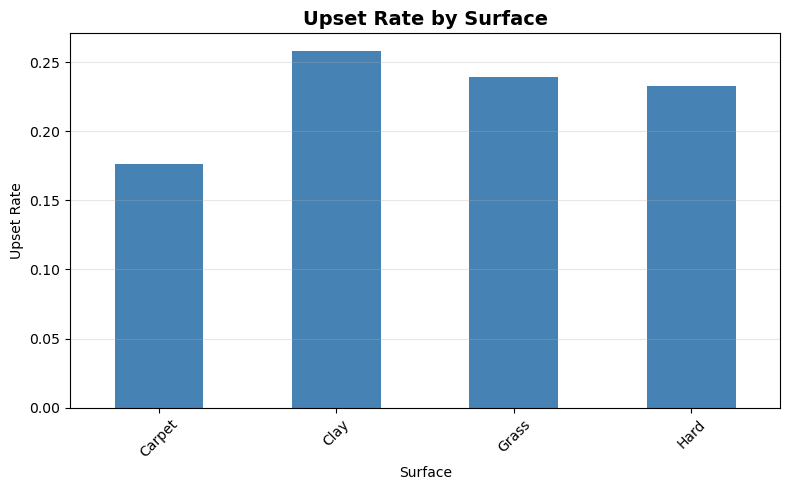

In [2]:
# Calculate upset rates by surface
surface_stats = df.groupby('surface').agg(
    total_matches=('upset', 'count'),
    upsets=('upset', 'sum'),
    upset_rate=('upset', 'mean')
).round(3)

print(surface_stats)

# Visualize
plt.figure(figsize=(8, 5))
surface_stats['upset_rate'].plot(kind='bar', color='steelblue')
plt.title('Upset Rate by Surface', fontsize=14, fontweight='bold')
plt.xlabel('Surface')
plt.ylabel('Upset Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Upset Frequency by Tournament Level

               total_matches  upsets  upset_rate
tourney_level                                   
A                      12008    3252       0.271
M                       4508     964       0.214
D                       1170     238       0.203
G                       3665     707       0.193
F                        175      24       0.137


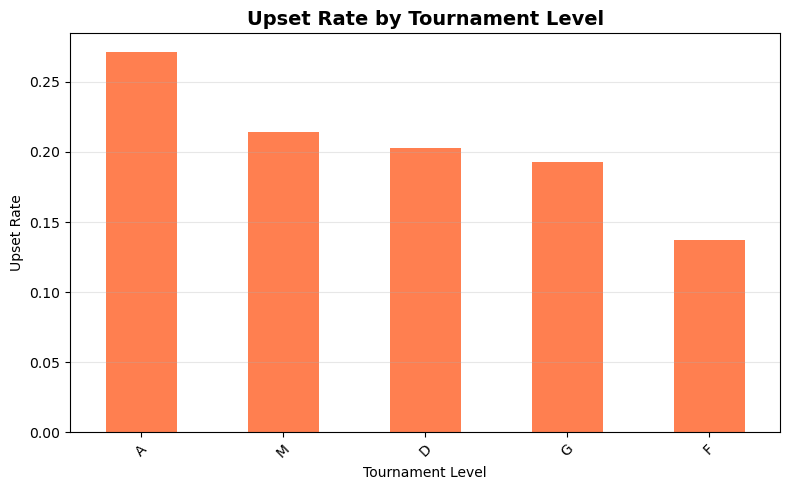

In [3]:
# Calculate upset rates by tournament level
level_stats = df.groupby('tourney_level').agg(
    total_matches=('upset', 'count'),
    upsets=('upset', 'sum'),
    upset_rate=('upset', 'mean')
).round(3).sort_values('upset_rate', ascending=False)

print(level_stats)

# Visualize
plt.figure(figsize=(8, 5))
level_stats['upset_rate'].plot(kind='bar', color='coral')
plt.title('Upset Rate by Tournament Level', fontsize=14, fontweight='bold')
plt.xlabel('Tournament Level')
plt.ylabel('Upset Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Upset Frequency by Ranking Difference

               total_matches  upsets  upset_rate
rank_diff_bin                                   
Underdog (<0)          13352       0       0.000
0-50                    4947    2538       0.513
51-100                  1553    1553       1.000
101-150                  511     511       1.000
151-200                  210     210       1.000
>200                     360     360       1.000


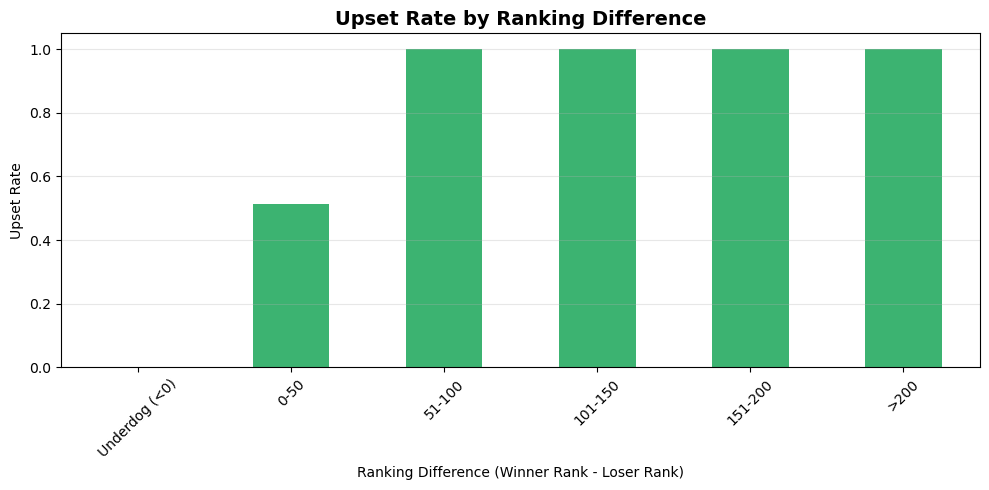

In [4]:
# Create ranking difference bins
df['rank_diff_bin'] = pd.cut(df['rank_difference'], 
                               bins=[-500, 0, 50, 100, 150, 200, 1000],
                               labels=['Underdog (<0)', '0-50', '51-100', '101-150', '151-200', '>200'])

# Calculate upset rates by ranking difference
rank_diff_stats = df.groupby('rank_diff_bin', observed=True).agg(
    total_matches=('upset', 'count'),
    upsets=('upset', 'sum'),
    upset_rate=('upset', 'mean')
).round(3)

print(rank_diff_stats)

# Visualize
plt.figure(figsize=(10, 5))
rank_diff_stats['upset_rate'].plot(kind='bar', color='mediumseagreen')
plt.title('Upset Rate by Ranking Difference', fontsize=14, fontweight='bold')
plt.xlabel('Ranking Difference (Winner Rank - Loser Rank)')
plt.ylabel('Upset Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Combined Analysis: Surface × Tournament Level

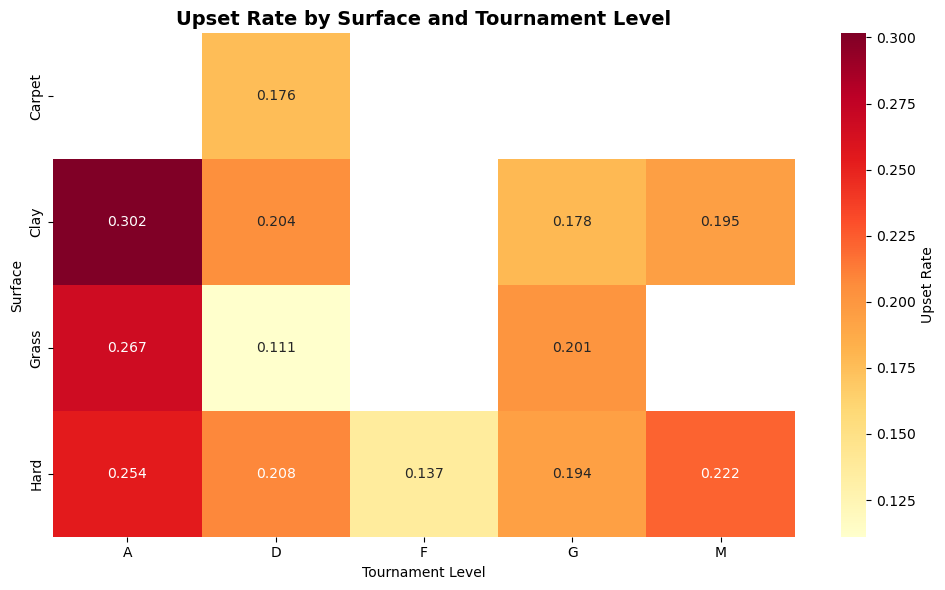

In [5]:
# Heatmap: upset rate by surface and tournament level
pivot_table = df.pivot_table(values='upset', index='surface', 
                              columns='tourney_level', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlOrRd', cbar_kws={'label': 'Upset Rate'})
plt.title('Upset Rate by Surface and Tournament Level', fontsize=14, fontweight='bold')
plt.xlabel('Tournament Level')
plt.ylabel('Surface')
plt.tight_layout()
plt.show()

## 6. Summary Statistics

In [6]:
print("="*60)
print("OVERALL UPSET STATISTICS")
print("="*60)
print(f"Total matches analyzed: {len(df):,}")
print(f"Total upsets: {df['upset'].sum():,}")
print(f"Overall upset rate: {df['upset'].mean():.3%}")
print(f"\nRanking difference stats for upsets:")
print(df[df['upset']==1]['rank_difference'].describe().round(1))

OVERALL UPSET STATISTICS
Total matches analyzed: 21,526
Total upsets: 5,185
Overall upset rate: 24.087%

Ranking difference stats for upsets:
count    5185.0
mean       84.3
std       111.6
min        20.0
25%        33.0
50%        51.0
75%        89.0
max      1711.0
Name: rank_difference, dtype: float64
